# The SciPy Library

O pacote scipy contém várias ferramentas dedicadas a problemas comuns em computação científica. Seus diferentes sub-módulos correspondem a diferentes aplicações, tais como interpolação, integração, otimização, processamento de imagens, estatísticas, funções especiais, etc

O SciPy pode ser comparado a outras bibliotecas de computação científica padrão, como a GSL (GNU Scientific Library para C e C + +), ou caixas de ferramentas do Matlab. O SciPy é o pacote principal de rotinas científicas em Python, que se destina a operar de forma eficiente em matrizes numpy, de modo que numpy e scipy trabalhem lado a lado.

Antes de implementar uma rotina, vale a pena verificar se o processamento de dados desejado não está implementado em SciPy. Como os programadores não-profissionais, os cientistas tendem a re-inventar a roda, o que leva a códigos com bugs, não ideais, e difíceis de compartilhar e insustentáveis. Por outro lado, as rotinas de scipy são otimizados e testadas, e devem, portanto, ser usadas sempre que possível.

Os módulos do SciPy abordados são:

- File input/output: scipy.io
- Special functions: scipy.special
- Linear algebra operations: scipy.linalg
- Fast Fourier transforms: scipy.fftpack
- Optimization and fit: scipy.optimize
- Statistics and random numbers: scipy.stats
- Interpolation: scipy.interpolate
- Numerical integration: scipy.integrate
- Signal processing: scipy.signal
- Image processing: scipy.ndimage


## Scipy `Optimize`

O SciPy Optimize fornece funções para minimizar (ou maximizar) funções objetivas, possivelmente sujeitas a restrições. Inclui solvers para problemas não-lineares (com suporte para algoritmos de otimização locais e globais), programação linear, mínimos quadrados restritos e não-lineares, encontrar raízes e ajuste de curvas.

In [1]:
%matplotlib inline
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
import math

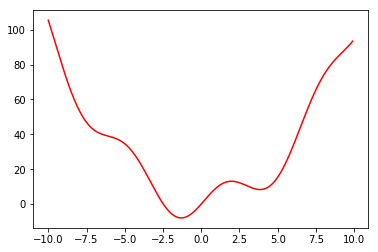

In [2]:
def f(x):
    return x**2 + 10 * math.sin(x)

f2 = np.vectorize(f)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f2(x), 'r-')


### BFGS 
Broyden–Fletcher–Goldfarb–Shanno algorithm

In [3]:
from scipy.optimize import fmin_bfgs

xmin = fmin_bfgs(f, 0)
xmin

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

Text(0.5, 1.0, 'BFGS')

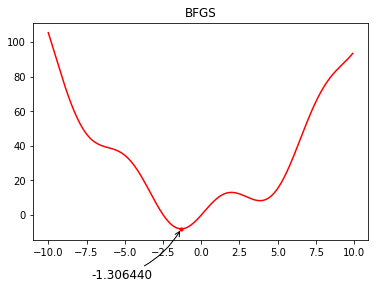

In [4]:
plt.plot(x, f2(x), 'r-')
plt.scatter([xmin],[f(xmin)], 10, color='red')
plt.annotate('%f' % xmin, 
        xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
          xytext=(-90, -50), textcoords='offset points',
          arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.title('BFGS')

## Brute force

In [5]:
from scipy.optimize import brute
grid = (-10, 10, 0.1)
xmin = brute(f, (grid,))
xmin

array([-1.30641113])

Text(0.5, 1.0, 'Brute force')

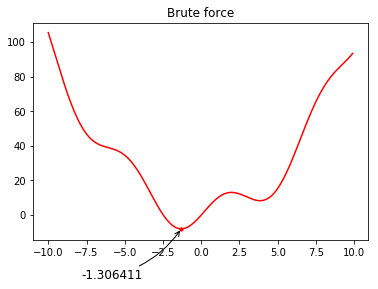

In [6]:
plt.plot(x, f2(x), 'r-')
plt.scatter([xmin],[f(xmin)], 10, color='red')
plt.annotate('%f' % xmin, 
        xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
          xytext=(-100, -50), textcoords='offset points',
          arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.title('Brute force')

## Algebra linerar `scipy.linalg`

O módulo scipy.linalg fornece operações de álgebra linear padrão, contando com uma implementação eficiente (BLAS, LAPACK).

O scipy.linalg.det() calcula o determinante de uma matriz quadrada:

In [7]:
from scipy import linalg
from scipy.linalg import solve

#5x + 6y = 10 e 2x + 4y = 8.


a = np.array([[5, 6], [2, 4]])
b = np.array([10, 8])
x = solve(a, b)
x

array([-1. ,  2.5])

In [8]:
import scipy as sp

A=sp.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print("Matrix A")
print(A)
B=A.copy()
B[:,3]=[0,0,1,0]
print("Matrix B")
print(B)
C=B.copy()
C[3,:]=[0,0,1,0]
print("Matrix C")
print(C)
print("A-C=")
print(A-C)
print("A*C=")
print(sp.dot(A,C))

Matrix A
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Matrix B
[[ 1  2  3  0]
 [ 5  6  7  0]
 [ 9 10 11  1]
 [13 14 15  0]]
Matrix C
[[ 1  2  3  0]
 [ 5  6  7  0]
 [ 9 10 11  1]
 [ 0  0  1  0]]
A-C=
[[ 0  0  0  4]
 [ 0  0  0  8]
 [ 0  0  0 11]
 [13 14 14 16]]
A*C=
[[ 38  44  54   3]
 [ 98 116 142   7]
 [158 188 230  11]
 [218 260 318  15]]



A função scipy.linalg.inv() calcula a inversa de uma matriz quadrada:

In [9]:
arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr


array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Se a matriz for singular (determinante igual a zero), a inversa vai resultar em um erro LinAlgError:

In [10]:
arr = np.array([[3, 2],
                [6, 4]])
linalg.inv(arr)

LinAlgError: singular matrix

## Scipy `Stats`

O módulo scipy.stats contém ferramentas estatísticas e descrições probabilísticas de processos aleatórios. Geradores de números aleatórios para vários processos aleatórios podem ser encontrados em numpy.random.

In [20]:
from scipy import stats
loc, std = stats.norm.fit(a)
loc     
std

np.median(a)

0.054055369012942195

In [21]:
# A mediana é chamado o percentil 50, pelo facto de 50% da observação são abaixo:
stats.scoreatpercentile(a, 50)

0.054055369012942195

In [22]:
#Da mesma forma, podemos calcular o percentil 90:
stats.scoreatpercentile(a, 90)

1.481288531670542


Histograma e função de densidade de probabilidade
Dadas as observações de um processo aleatório, seu histograma é um estimador de FDP do processo aleatório (função densidade de probabilidade):

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


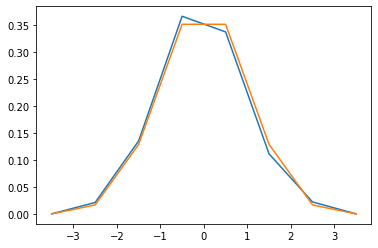

In [23]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

from scipy import stats
b = stats.norm.pdf(bins)  # norm é uma districuição
plt.plot(bins, histogram)
plt.plot(bins, b)

### Testes Estatísticos
Um teste estatístico é um indicador de decisão. Por exemplo, se temos dois conjuntos de observações, que nós assumimos gerados a partir de processos de Gauss, podemos usar uma T-teste para decidir se os dois conjuntos de observações são significativamente diferentes:

In [25]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)


Ttest_indResult(statistic=-3.048345282974546, pvalue=0.002893712547004226)

A saída resultante é composta por:

O valor estatístico T: é um número do sinal que é proporcional à diferença entre os dois processos aleatórios e a magnitude está relacionada com o significado dessa diferença.
O valor de p: probabilidade de ambos os processos são idênticas. Se for próximo de 1, os dois processos são quase certamente idênticos. O mais próximo de zero, o mais provável é que os processos tenham diferentes significados.

## Scipy `Interpolate`

O scipy.interpolate é útil para a montagem de uma função a partir de dados experimentais e, portanto, avaliar os pontos onde não existe nenhuma medida. O módulo é baseado nas subrotinas Fortran FitPack do projecto netlib.


A classe scipy.interpolate.interp1d pode construir uma função de interpolação linear.

Uma interpolação cúbica também pode ser selecionada através da palavra-chave argumento kind opcional:

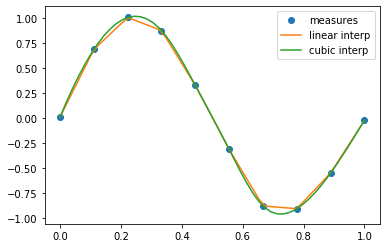

In [26]:
# Generate data
import numpy as np
np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

material extra: 
https://scipy-lectures.org/index.html

https://docs.scipy.org/doc/scipy/reference/index.html